**Proyek: Analisis Eksplorasi Data (EDA) pada Dataset Penjualan Real Estate**


**Tujuan:**
Anda adalah seorang analis data di sebuah perusahaan properti. Anda diberi dataset penjualan rumah dan diminta untuk melakukan analisis eksplorasi untuk memahami faktor-faktor apa saja yang memengaruhi harga properti dan menemukan pola penjualan yang menarik.

---

**Load Dataset**

**1: Pemuatan dan Eksplorasi Awal**

- Muat dataset ke dalam DataFrame pandas.
- Gunakan .head(), .info(), dan .describe() untuk mendapatkan gambaran umum data. Identifikasi kolom mana yang memiliki tipe data yang salah atau data yang hilang.

In [202]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("subhiarjaria09/real-estate-property-transactions-dataset")

print("Path to dataset files:", path)


# Cek file apa saja yang ada di folder dataset
print(os.listdir(path))


Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\subhiarjaria09\real-estate-property-transactions-dataset\versions\1
['V3.csv']


In [203]:
file_path = os.path.join(path, "V3.csv")

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

real_estate_trans_df = pd.read_csv(file_path)

***muat dataset ke dataframe***

In [205]:
print('Dataset_penjualan Real estate')
real_estate_trans_df.head()

Dataset_penjualan Real estate


,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South
1,2009-01-02,2009,NaN,73080.0,152000.0,Single Family,Detached House,3,1,935.0,1.025953,North
2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East
3,2009-01-02,2009,Norwalk,571060.0,1000000.0,Single Family,Detached House,3,2,NaN,1.025953,South
4,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East


***get an overview***

In [206]:
real_estate_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           8745 non-null   object 
 3   Estimated Value    8771 non-null   float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        8718 non-null   float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB


In [207]:
real_estate_trans_df.describe()

,Year,Estimated Value,Sale Price,num_rooms,num_bathrooms,carpet_area,property_tax_rate
count,10000.000000,8.771000e+03,1.000000e+04,10000.000000,10000.000000,8718.000000,10000.000000
mean,2015.880100,4.445842e+05,6.224748e+05,3.329600,2.334000,1111.658981,1.143517
std,4.088031,7.513565e+05,1.029709e+06,0.885123,1.209293,305.058455,0.166762
min,2009.000000,0.000000e+00,2.000000e+03,3.000000,1.000000,900.000000,1.003979
25%,2012.000000,1.305250e+05,1.600000e+05,3.000000,1.000000,960.000000,1.023495
50%,2016.000000,2.431800e+05,3.400000e+05,3.000000,2.000000,1021.000000,1.025899
75%,2019.000000,4.418300e+05,6.300000e+05,3.000000,3.000000,1082.000000,1.348259
max,2022.000000,2.111991e+07,2.575000e+07,8.000000,8.000000,2989.000000,1.422308


---

**2: Pembersihan dan Validasi Data**

- Tangani Data Hilang: Lakukan imputasi untuk kolom Jumlah Kamar Tidur yang hilang. Pilihlah antara median atau modus dan berikan alasan Anda.
- Konversi Tipe Data: Ubah kolom Tanggal Penjualan dari object menjadi datetime. Ubah Jumlah Kamar Tidur menjadi int.
- Identifikasi Outlier: Gunakan box plot untuk memeriksa outlier pada kolom Harga (USD) dan Luas Bangunan (m2). Analisis outlier tersebut, apakah perlu dihapus atau dipertahankan? Jelaskan keputusan Anda.

***tangani data yang hilang***

In [208]:
# buat kolom kamar tidur anggap  pengurangan ruangan dan kamar mandi menghasilkan kamar tidur
# jika ada nilai yang 0 anggap itu missing value
real_estate_trans_df['num_bedrooms'] = real_estate_trans_df['num_rooms'] - real_estate_trans_df['num_bathrooms']

real_estate_trans_df.head()

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face,num_bedrooms
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South,0
1,2009-01-02,2009,NaN,73080.0,152000.0,Single Family,Detached House,3,1,935.0,1.025953,North,2
2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East,2
3,2009-01-02,2009,Norwalk,571060.0,1000000.0,Single Family,Detached House,3,2,NaN,1.025953,South,1
4,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East,2


In [209]:
# cek outlier dengan IQR
Q1 = real_estate_trans_df['num_bedrooms'].quantile(0.25)
Q3 = real_estate_trans_df['num_bedrooms'].quantile(0.75)

IQR = Q3 -  Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

outlier = real_estate_trans_df[(real_estate_trans_df['num_bedrooms'] < lower_bound) | (real_estate_trans_df['num_bedrooms'] > upper_bound)]

print('\nOutlier num_bedrooms yang terdeteksi dengan IQR:')
print(outlier['num_bedrooms'])


Outlier num_bedrooms yang terdeteksi dengan IQR:
0       0
1       2
2       2
3       1
4       2
       ..
9995    1
9996    0
9997    2
9998    1
9999    2
Name: num_bedrooms, Length: 10000, dtype: int64


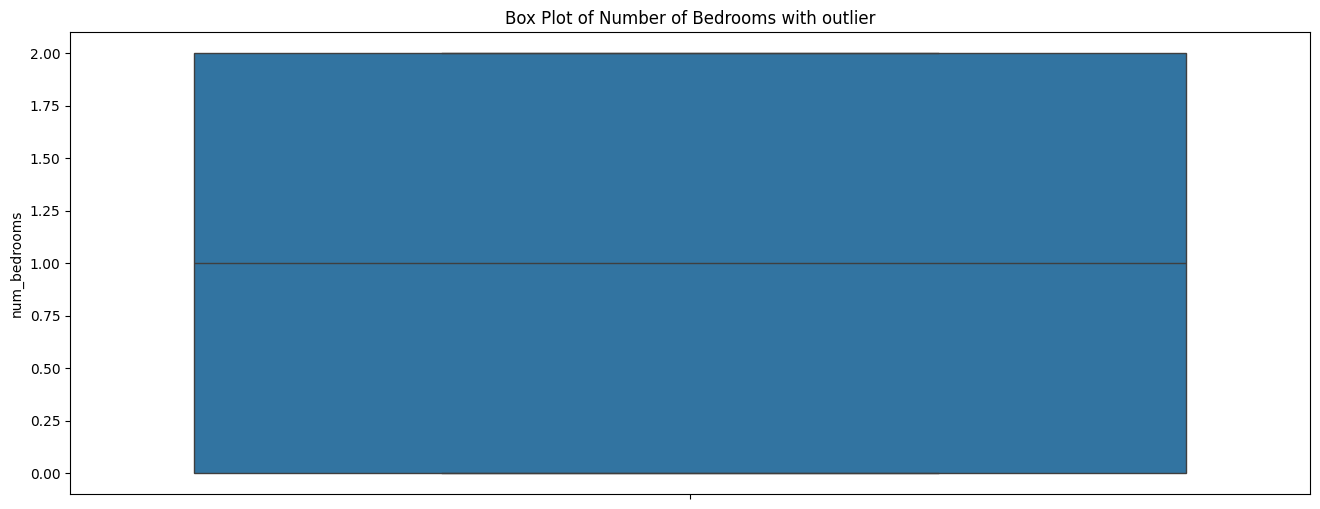

In [210]:
# lihat dengan boxplot agar lebih enak

plt.figure(figsize=(16, 6))
sns.boxplot(data=real_estate_trans_df, y='num_bedrooms')
plt.title('Box Plot of Number of Bedrooms with outlier')
plt.show()

In [211]:
print(real_estate_trans_df['num_bedrooms'].mean())

0.9956


- tidak terdeteksi outlier nilai cenderung antara 0 sampai 2 oleh karena itu kita bisa menggunakan nilai mean untuk mengisi
missing value ini sangat aman tetapi pada saat di hitung meannya ada di kisaran 0.9956 yang menyebabkan missing values akan terisi
dengan 0 kembali jadi saya akan mengisi dengan mode saja.

In [212]:
# imputation missing value dengan mode
mode_bedrooms = real_estate_trans_df[real_estate_trans_df['num_bedrooms'] != 0]['num_bedrooms'].mode()[0]
real_estate_trans_df['num_bedrooms'] = real_estate_trans_df['num_bedrooms'].replace(0, mode_bedrooms)

# pastikan integer
real_estate_trans_df['num_bedrooms'] = real_estate_trans_df['num_bedrooms'].astype(int)


In [213]:
print(real_estate_trans_df.dtypes)

Date                  object
Year                   int64
Locality              object
Estimated Value      float64
Sale Price           float64
Property              object
Residential           object
num_rooms              int64
num_bathrooms          int64
carpet_area          float64
property_tax_rate    float64
Face                  object
num_bedrooms           int32
dtype: object


In [214]:
print(real_estate_trans_df.head())

         Date  Year    Locality  Estimated Value  Sale Price       Property  \
0  2009-01-02  2009   Waterbury         111440.0    185000.0  Single Family   
1  2009-01-02  2009         NaN          73080.0    152000.0  Single Family   
2  2009-01-02  2009   Waterbury          50540.0    105000.0  Single Family   
3  2009-01-02  2009     Norwalk         571060.0   1000000.0  Single Family   
4  2009-01-02  2009  Bridgeport        4775276.0    272900.0  Single Family   

      Residential  num_rooms  num_bathrooms  carpet_area  property_tax_rate  \
0  Detached House          3              3        996.0           1.025953   
1  Detached House          3              1        935.0           1.025953   
2  Detached House          3              1        951.0           1.025953   
3  Detached House          3              2          NaN           1.025953   
4  Detached House          3              1        971.0           1.025953   

    Face  num_bedrooms  
0  South             2  


***additional mengisi seluruh missing value dari semua kolom yang mempunya missing value agar lebih clean***

In [215]:
real_estate_trans_df.isna().sum()

Date                    0
Year                    0
Locality             1255
Estimated Value      1229
Sale Price              0
Property                0
Residential             0
num_rooms               0
num_bathrooms           0
carpet_area          1282
property_tax_rate       0
Face                    0
num_bedrooms            0
dtype: int64

In [216]:
# take look at percentage of missing values
missing_pct = real_estate_trans_df.isnull().mean() * 100
print(missing_pct.round(2).astype(str) + '%')

Date                   0.0%
Year                   0.0%
Locality             12.55%
Estimated Value      12.29%
Sale Price             0.0%
Property               0.0%
Residential            0.0%
num_rooms              0.0%
num_bathrooms          0.0%
carpet_area          12.82%
property_tax_rate      0.0%
Face                   0.0%
num_bedrooms           0.0%
dtype: object


In [217]:
real_estate_trans_df['Locality'].unique()

array(['Waterbury', nan, 'Norwalk', 'Bridgeport', 'Greenwich',
       'Fairfield', 'West Hartford', 'Stamford'], dtype=object)

In [218]:
# isi nilai Locality dengan mode
import numpy as np

mode_value = real_estate_trans_df['Locality'].replace('', np.nan).mode()[0]
real_estate_trans_df['Locality'] = real_estate_trans_df['Locality'].fillna(mode_value)

print("\nMissing Locality setelah imputasi:", real_estate_trans_df['Locality'].isnull().sum())




Missing Locality setelah imputasi: 0


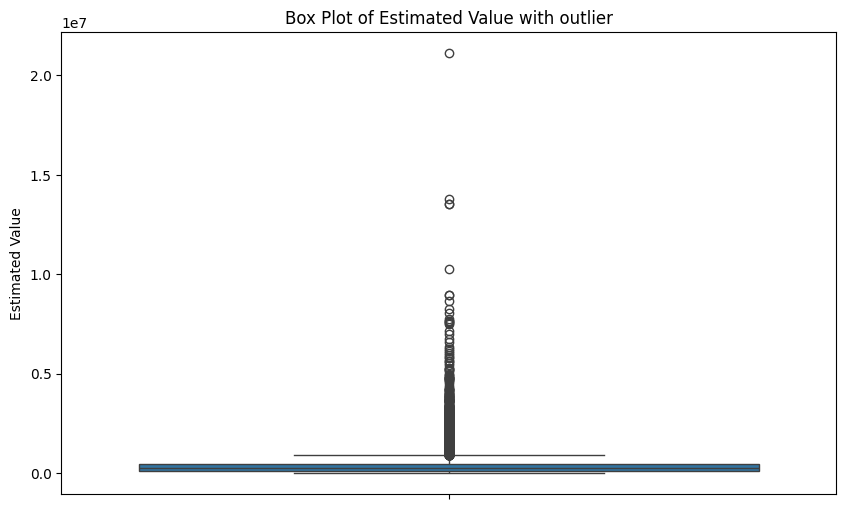

In [219]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=real_estate_trans_df, y='Estimated Value')
plt.title('Box Plot of Estimated Value with outlier')
plt.show()

-terdapat outlier median lebih baik

In [220]:
median_est_val = real_estate_trans_df['Estimated Value'].median()
real_estate_trans_df['Estimated Value'] = real_estate_trans_df['Estimated Value'].fillna(median_est_val)

print("\nMissing Estimated Value setelah imputasi:", real_estate_trans_df['Estimated Value'].isnull().sum())



Missing Estimated Value setelah imputasi: 0


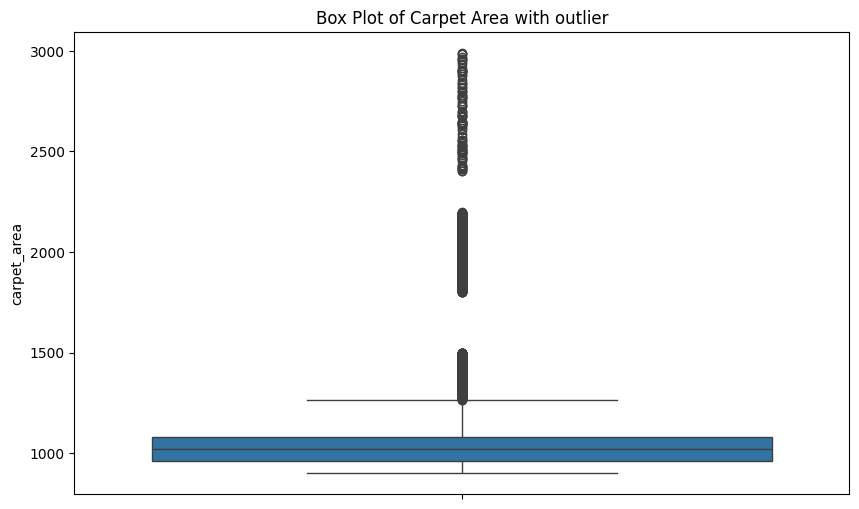

In [221]:
# boxplot carpet area
plt.figure(figsize=(10, 6))
sns.boxplot(data=real_estate_trans_df, y='carpet_area')
plt.title('Box Plot of Carpet Area with outlier')
plt.show()


In [222]:
# imputation carpet area with median 
median_carpet = real_estate_trans_df['carpet_area'].median()
real_estate_trans_df['carpet_area'] = real_estate_trans_df['carpet_area'].fillna(median_carpet)

print("\nMissing carpet_area setelah imputasi:", real_estate_trans_df['carpet_area'].isnull().sum())



Missing carpet_area setelah imputasi: 0


In [223]:
real_estate_trans_df.isna().sum()

Date                 0
Year                 0
Locality             0
Estimated Value      0
Sale Price           0
Property             0
Residential          0
num_rooms            0
num_bathrooms        0
carpet_area          0
property_tax_rate    0
Face                 0
num_bedrooms         0
dtype: int64

In [224]:
# cek nilai unik di kolom Property
print(real_estate_trans_df['Property'].unique())


['Single Family' '?' 'Two Family' 'Three Family' 'Four Family']


In [225]:
import numpy as np

# Ganti tanda "?" jadi NaN khusus di kolom Property
real_estate_trans_df['Property'] = real_estate_trans_df['Property'].replace('?', np.nan)

# Cek lagi hasilnya
print("Unique:", real_estate_trans_df['Property'].unique())
print("Missing Property:", real_estate_trans_df['Property'].isnull().sum())


Unique: ['Single Family' nan 'Two Family' 'Three Family' 'Four Family']
Missing Property: 1788


In [226]:
mode_property = real_estate_trans_df['Property'].mode().iloc[0]
real_estate_trans_df['Property'] = real_estate_trans_df['Property'].fillna(mode_property)

print("Missing Property:", real_estate_trans_df['Property'].isnull().sum())


Missing Property: 0


In [227]:
real_estate_trans_df.head(20)

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face,num_bedrooms
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South,2
1,2009-01-02,2009,Bridgeport,73080.0,152000.0,Single Family,Detached House,3,1,935.0,1.025953,North,2
2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East,2
3,2009-01-02,2009,Norwalk,571060.0,1000000.0,Single Family,Detached House,3,2,1021.0,1.025953,South,1
4,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East,2
5,2009-01-02,2009,Greenwich,243180.0,5187000.0,Single Family,Detached House,3,2,1026.0,1.025953,South,1
6,2009-01-03,2009,Norwalk,243180.0,1340000.0,Single Family,Detached House,3,1,936.0,1.025953,North,2
7,2009-01-03,2009,Norwalk,172620.0,409000.0,Single Family,Detached House,3,3,1004.0,1.025953,South,2
8,2009-01-04,2009,Bridgeport,243180.0,410000.0,Two Family,Duplex,4,3,1498.0,1.025953,West,1
9,2009-01-04,2009,Waterbury,243180.0,176000.0,Single Family,Detached House,3,1,1008.0,1.025953,North,2


***Konversi Tipe Data: Ubah kolom Tanggal Penjualan dari object menjadi datetime. Ubah Jumlah Kamar Tidur menjadi int.
dan kolom lainnya yang memungkinkan***

In [228]:
print(real_estate_trans_df.dtypes)

Date                  object
Year                   int64
Locality              object
Estimated Value      float64
Sale Price           float64
Property              object
Residential           object
num_rooms              int64
num_bathrooms          int64
carpet_area          float64
property_tax_rate    float64
Face                  object
num_bedrooms           int32
dtype: object


In [229]:
#ubah data type
real_estate_trans_df['Date'] =  real_estate_trans_df['Date'].astype('datetime64[ns]')
real_estate_trans_df['Locality'] =  real_estate_trans_df['Locality'].astype('category')
real_estate_trans_df['Property'] =  real_estate_trans_df['Property'].astype('category')  
real_estate_trans_df['Residential'] = real_estate_trans_df['Residential'].astype('category')
real_estate_trans_df['Face'] =  real_estate_trans_df['Face'].astype('category')
real_estate_trans_df['num_rooms'] =  real_estate_trans_df['num_rooms'].astype('int32')
real_estate_trans_df['num_bathrooms'] =  real_estate_trans_df['num_bathrooms'].astype('int32')

print(real_estate_trans_df.dtypes)

Date                 datetime64[ns]
Year                          int64
Locality                   category
Estimated Value             float64
Sale Price                  float64
Property                   category
Residential                category
num_rooms                     int32
num_bathrooms                 int32
carpet_area                 float64
property_tax_rate           float64
Face                       category
num_bedrooms                  int32
dtype: object


In [230]:
real_estate_trans_df.head()

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face,num_bedrooms
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South,2
1,2009-01-02,2009,Bridgeport,73080.0,152000.0,Single Family,Detached House,3,1,935.0,1.025953,North,2
2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East,2
3,2009-01-02,2009,Norwalk,571060.0,1000000.0,Single Family,Detached House,3,2,1021.0,1.025953,South,1
4,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East,2


***Identifikasi Outlier: Gunakan box plot untuk memeriksa outlier pada kolom Harga (USD) dan Luas Bangunan (m2). Analisis outlier tersebut, apakah perlu dihapus atau dipertahankan? Jelaskan keputusan Anda. karna tidak ada kolom luas bangunan maka kita akan membuat kolom tambahan dari carpet_area * 1.5 (asumsi 15% tambahan)***

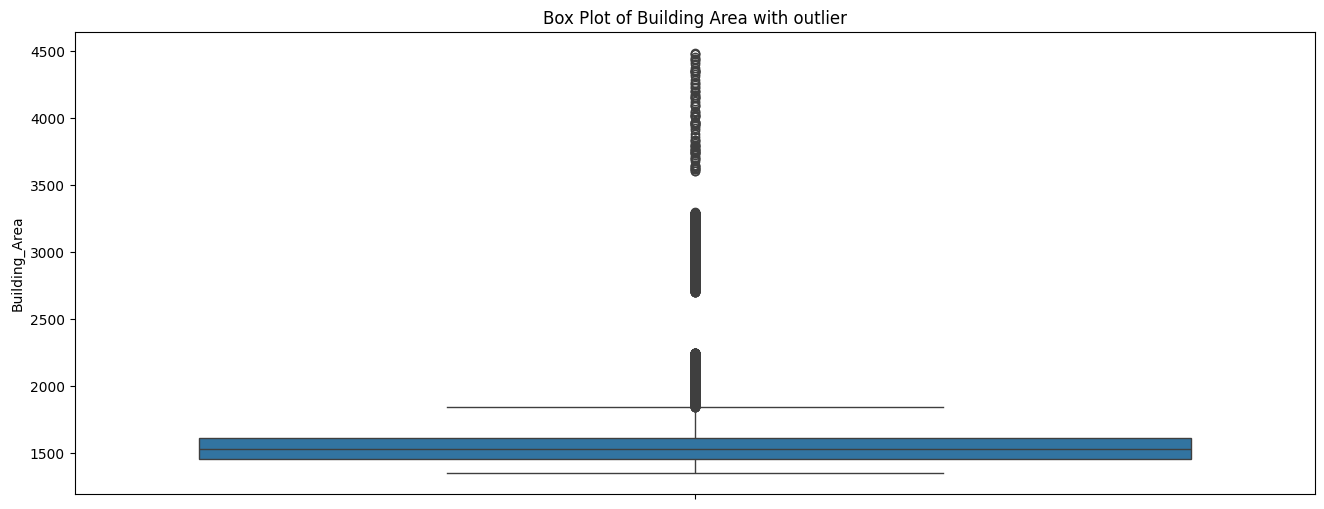

In [231]:
# adding new column Building_Area
real_estate_trans_df['Building_Area'] = real_estate_trans_df['carpet_area'] * 1.5 # asumsi 15% tambahan


plt.figure(figsize=(16, 6))
sns.boxplot(data=real_estate_trans_df, y='Building_Area')
plt.title('Box Plot of Building Area with outlier')
plt.show()


- terdapat outliers kita akan gunakan log transform untuk mengurangi efek outliers atu dengan winsorizing

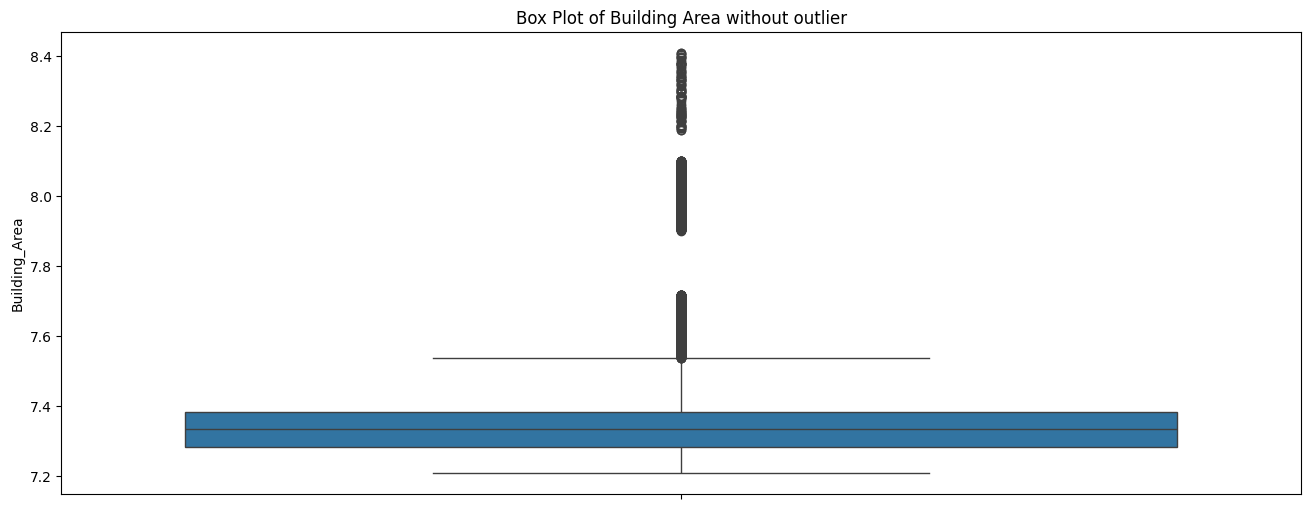

In [232]:
real_estate_trans_df['Building_Area'] = np.log1p(real_estate_trans_df['Building_Area'])

plt.figure(figsize=(16, 6))
sns.boxplot(data=real_estate_trans_df, y='Building_Area')
plt.title('Box Plot of Building Area without outlier')
plt.show()

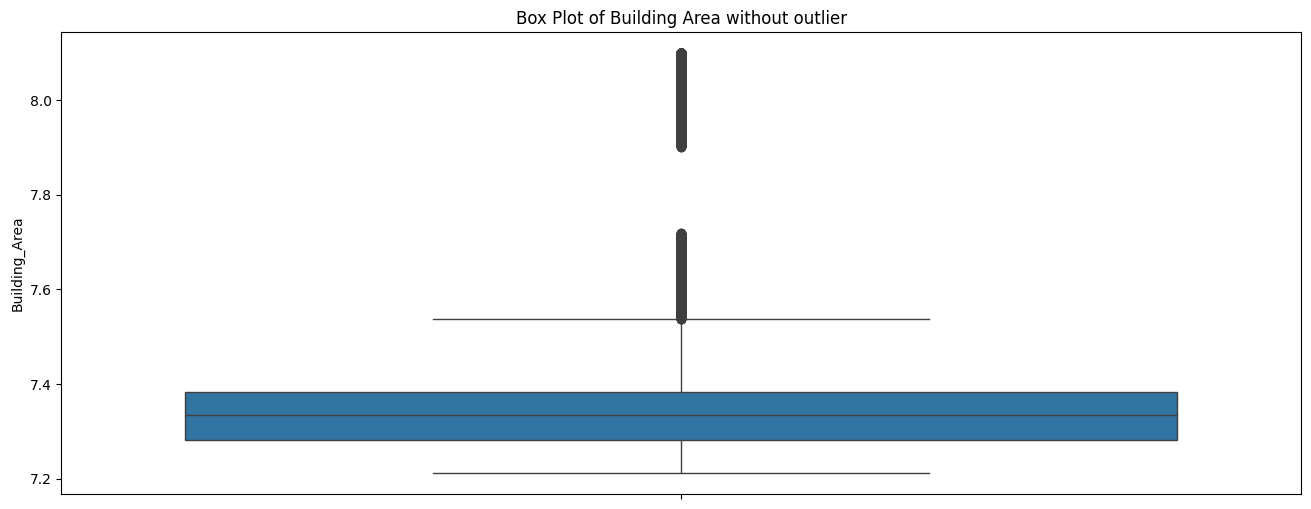

In [233]:
# Winsorizing 
# Batasi outlier ke batas tertentu (misal 1%–99% percentile) → tetap pakai data tapi tidak ekstrem:
lower = real_estate_trans_df['Building_Area'].quantile(0.01)
upper = real_estate_trans_df['Building_Area'].quantile(0.99)
real_estate_trans_df['Building_Area'] = real_estate_trans_df['Building_Area'].clip(lower, upper)


plt.figure(figsize=(16, 6))
sns.boxplot(data=real_estate_trans_df, y='Building_Area')
plt.title('Box Plot of Building Area without outlier')
plt.show()

- tidak menghapus ouliers karena luas rumah yang besar dan kecil itu sangat wajar untuk saat ini dibiarkan dulu lebih baik
outliers akan di hapus apabila kita akan melakukan agregasi atau perhitungan pusat data agar nilai yang lebih tinggi tidak mempengaruhi nilai dari kebanyakan yang ada (prinsipnya: outlier dipertahankan, tapi pengaruhnya bisa dikendalikan saat analisis statistik.)

---
**3: Rekayasa Fitur**

- Buat kolom baru Bulan Penjualan dan Tahun Penjualan dari kolom Tanggal Penjualan.
- Buat kolom baru Harga per Meter Persegi dengan membagi Harga (USD) dengan Luas Bangunan (m2).
- Gunakan pd.cut() pada kolom Harga (USD) untuk membuat kolom kategorikal baru Kategori Harga dengan label: "Murah", "Menengah", dan "Mahal" berdasarkan kuartil.

In [234]:
# ***Buat kolom baru Bulan Penjualan dan Tahun Penjualan dari kolom Tanggal Penjualan.***
# kolom year sudah ada cukup ekstaks moth

real_estate_trans_df['month'] = real_estate_trans_df['Date'].dt.month

# print(real_estate_trans_df[['Date', 'month', 'Year']])
# print(real_estate_trans_df[['Date', 'month', 'Year']].dtypes)


# Buat kolom baru Harga per Meter Persegi dengan membagi Harga (USD) dengan Luas Bangunan (m2)
real_estate_trans_df['price_per_square_meter'] = real_estate_trans_df['Sale Price'] / real_estate_trans_df['Building_Area']


# Gunakan pd.cut() pada kolom Harga (USD) untuk membuat kolom kategorikal baru 
# Kategori Harga dengan label: "Murah", "Menengah", dan "Mahal" berdasarkan kuartil.

Q1 = real_estate_trans_df['Sale Price'].quantile(1/3)
Q2 = real_estate_trans_df['Sale Price'].quantile(2/3)

real_estate_trans_df['Price_Category'] = pd.cut(real_estate_trans_df['Sale Price'],
                                                bins=[-float('inf'), Q1, Q2, float('inf')],
                                                labels=['Cheap', 'Middle', 'Exspensive'])

# print(real_estate_trans_df[['Sale Price', 'Price_Category']].head(10))



In [235]:
real_estate_trans_df.head()

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face,num_bedrooms,Building_Area,month,price_per_square_meter,Price_Category
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South,2,7.309881,1,25308.207850,Cheap
1,2009-01-02,2009,Bridgeport,73080.0,152000.0,Single Family,Detached House,3,1,935.0,1.025953,North,2,7.246724,1,20974.993900,Cheap
2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East,2,7.263680,1,14455.482737,Cheap
3,2009-01-02,2009,Norwalk,571060.0,1000000.0,Single Family,Detached House,3,2,1021.0,1.025953,South,1,7.334656,1,136339.051932,Exspensive
4,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East,2,7.284478,1,37463.220160,Middle


In [236]:
print(real_estate_trans_df.isna().sum())

Date                      0
Year                      0
Locality                  0
Estimated Value           0
Sale Price                0
Property                  0
Residential               0
num_rooms                 0
num_bathrooms             0
carpet_area               0
property_tax_rate         0
Face                      0
num_bedrooms              0
Building_Area             0
month                     0
price_per_square_meter    0
Price_Category            0
dtype: int64



----

**4: Analisis dan Visualisasi**

- Distribusi: Visualisasikan distribusi Harga (USD) menggunakan histogram. Apakah distribusinya normal?
- Hubungan:
    - Gunakan scatter plot untuk melihat hubungan antara Luas Bangunan (m2) dan Harga (USD). Beri warna (hue) berdasarkan Tipe Properti.
    - Gunakan bar plot untuk membandingkan Harga (USD) rata-rata di setiap Lokasi.
    - Gunakan box plot untuk membandingkan distribusi Harga (USD) antara properti yang Status Renovasi-nya "pernah direnovasi" dan "tidak pernah".
- Korelasi: Buat heatmap korelasi untuk semua fitur numerik. Fitur apa yang paling berkorelasi positif dengan Harga (USD)?

- Tren Waktu: Gunakan line plot untuk menunjukkan tren rata-rata Harga (USD) dari tahun ke tahun.

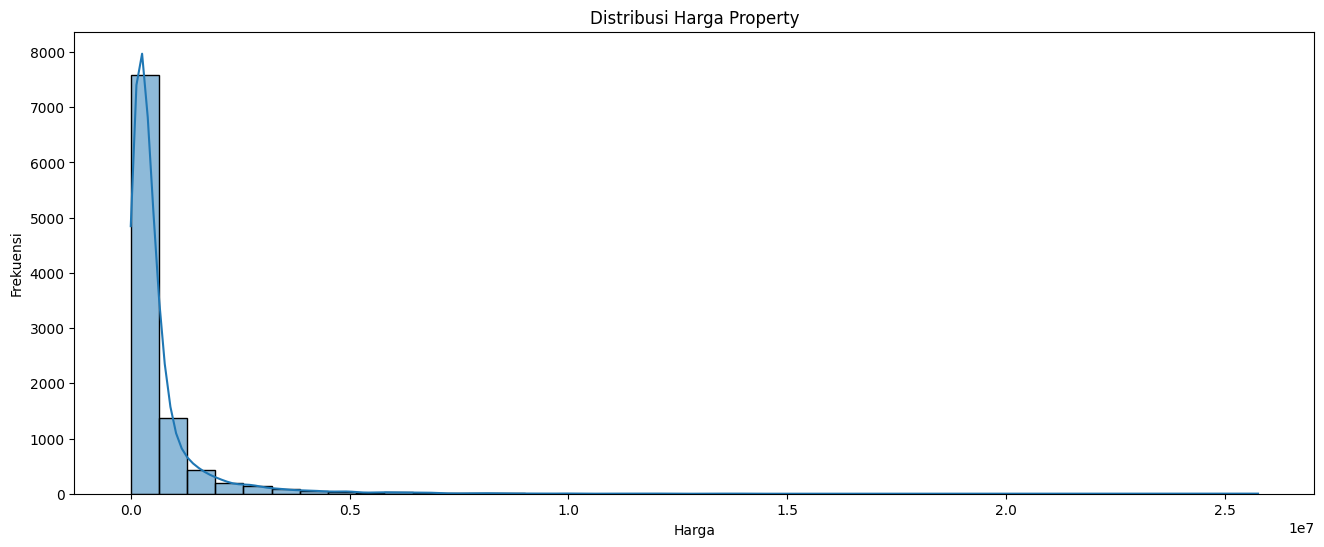

In [237]:
# --- Distribusi harga property --
plt.figure(figsize=(16, 6))
sns.histplot(real_estate_trans_df['Sale Price'], bins=40, kde=True)
plt.title('Distribusi Harga Property')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

- right skewed

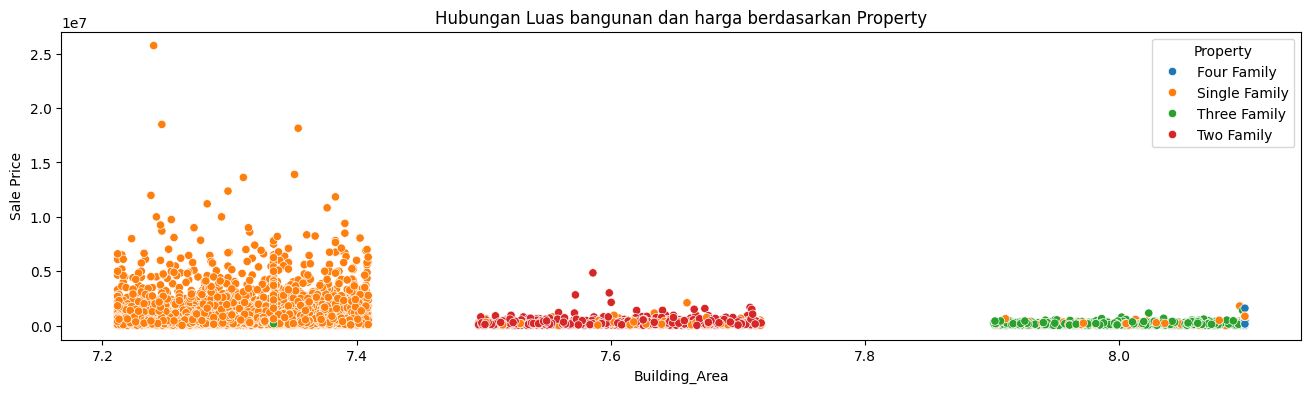

Koefisien korelasi antara x dan y berdasarkan z adalah: -0.13870043499861573


In [238]:
# Hubungan Luas bangunan dan harga berdasarkan Property
plt.figure(figsize=(16, 4))
sns.scatterplot(x='Building_Area', 
                y='Sale Price',
                hue='Property', 
                data=real_estate_trans_df)
plt.title('Hubungan Luas bangunan dan harga berdasarkan Property')
plt.show()


corr = real_estate_trans_df['Building_Area'].corr(real_estate_trans_df['Sale Price'])
print(f"Koefisien korelasi antara x dan y berdasarkan z adalah: {corr}")

- tidak ada korelasi sangat lemah mendekati 0

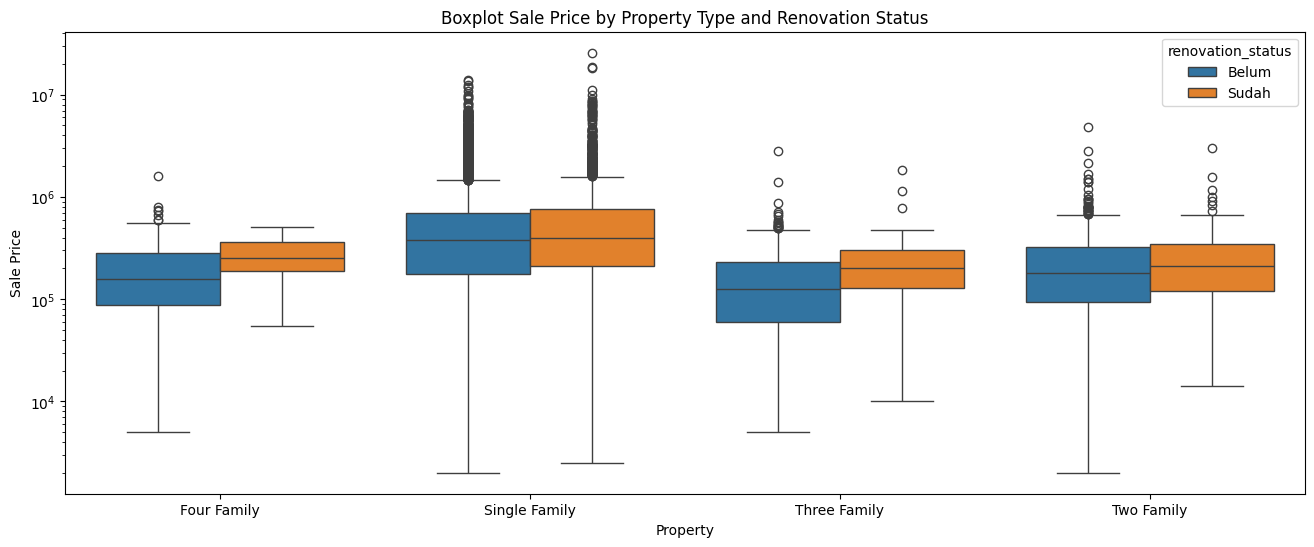

In [239]:
# Gunakan box plot untuk membandingkan distribusi Harga (USD) antara properti yang Status Renovasi-nya 
# "pernah direnovasi" dan "tidak pernah".

# karna data tidak ada kolom renovasi kita rekayasa sendiri
real_estate_trans_df['property_age'] = real_estate_trans_df['Year'].max() - real_estate_trans_df['Year']

# bikin kategori Renovated / Not Renovated -> diatas 20 tahun anggap sudah direnovasi
real_estate_trans_df['renovation_status'] = np.where(real_estate_trans_df['property_age'] > 10, "Sudah", "Belum")
real_estate_trans_df['renovation_status'] =  real_estate_trans_df['renovation_status'].astype('category')

# print(real_estate_trans_df['renovation_status'].dtypes)
# print(real_estate_trans_df['renovation_status'].head())
# print(real_estate_trans_df['renovation_status'].value_counts())


# boxplot distribusi harga property berdasarkan renovasi
plt.figure(figsize=(16, 6))
sns.boxplot(data=real_estate_trans_df,  
            x='Property', 
            y='Sale Price', 
            hue='renovation_status')
plt.title('Boxplot Sale Price by Property Type and Renovation Status')
plt.yscale('log')  # opsional: log scale biar outlier harga keliatan jelas
plt.show()



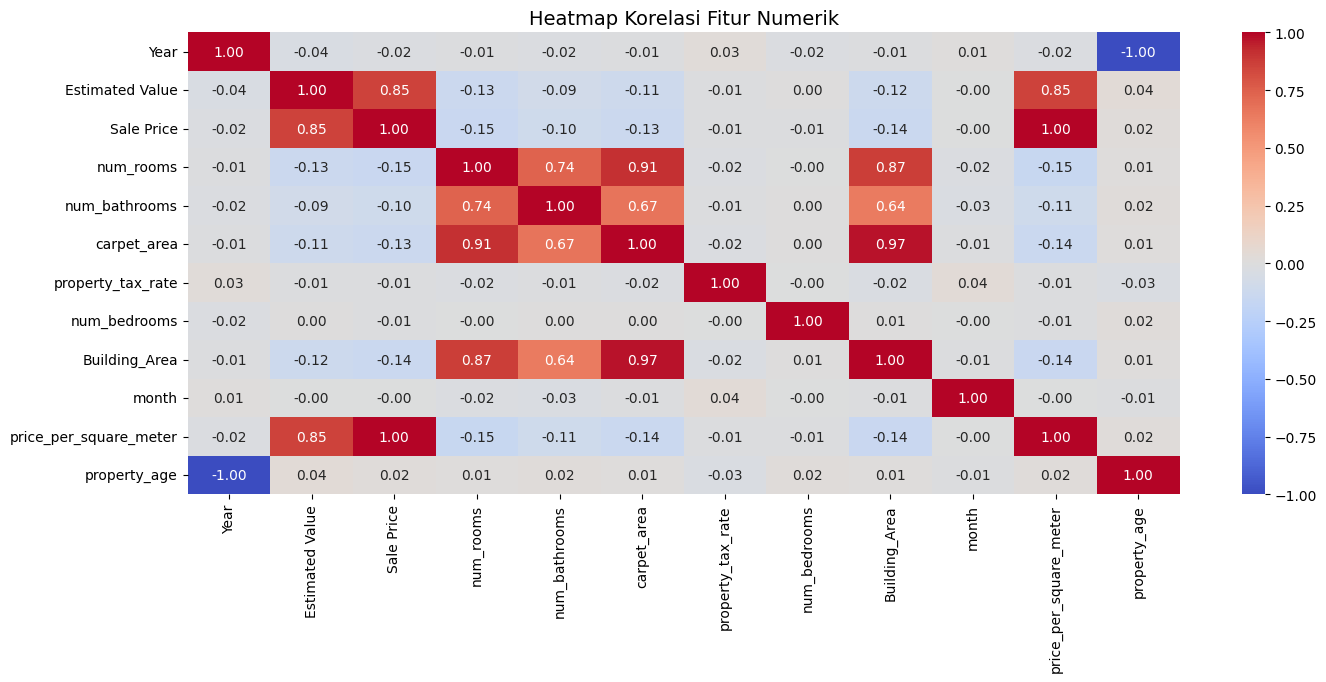


Korelasi dengan Sale Price:
Sale Price                1.000000
price_per_square_meter    0.999934
Estimated Value           0.853559
property_age              0.017016
month                    -0.001731
num_bedrooms             -0.010014
property_tax_rate        -0.013147
Year                     -0.017016
num_bathrooms            -0.104441
carpet_area              -0.131050
Building_Area            -0.138700
num_rooms                -0.146197
Name: Sale Price, dtype: float64


In [243]:
# pilih hanya kolom numerik
numeric_df = real_estate_trans_df.select_dtypes(include=['int32','int64','float64'])
# hitung korelasi
corr = numeric_df.corr()



plt.figure(figsize=(16,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Fitur Numerik", fontsize=14)
plt.show()

# cetak korelasi khusus dengan Sale Price, urutkan
print("\nKorelasi dengan Sale Price:")
print(corr['Sale Price'].sort_values(ascending=False))

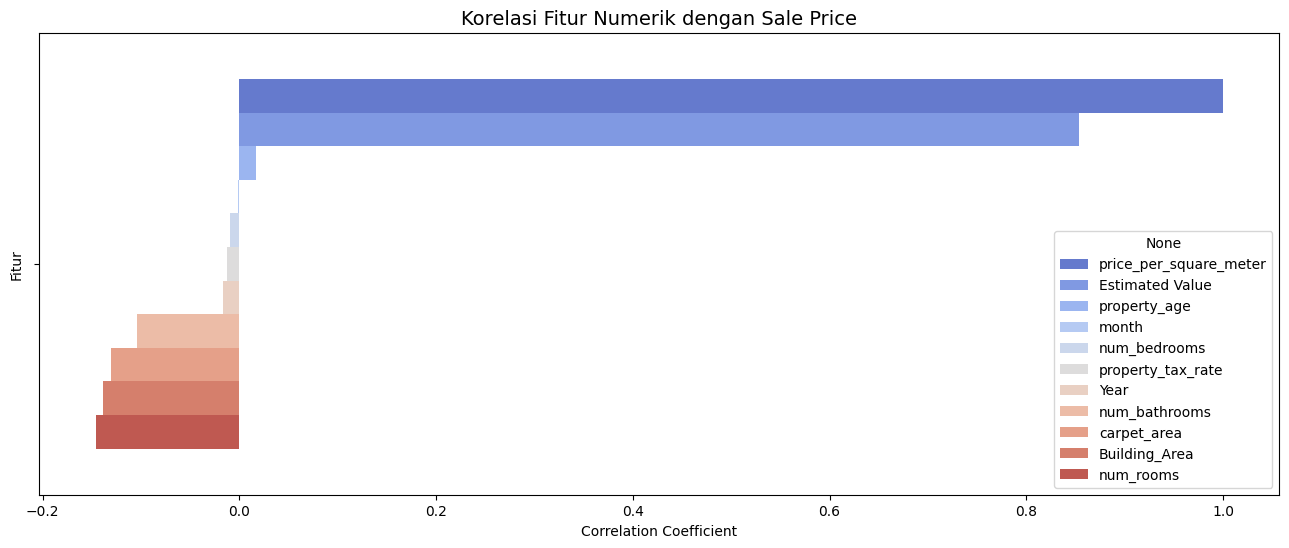

In [246]:
# ambil korelasi khusus dengan Sale Price, urutkan
sale_corr = corr['Sale Price'].drop('Sale Price').sort_values(ascending=False)

# plot barplot
plt.figure(figsize=(16,6))
sns.barplot(x=sale_corr.values, hue=sale_corr.index, palette="coolwarm")

plt.title("Korelasi Fitur Numerik dengan Sale Price", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Fitur")
plt.show()

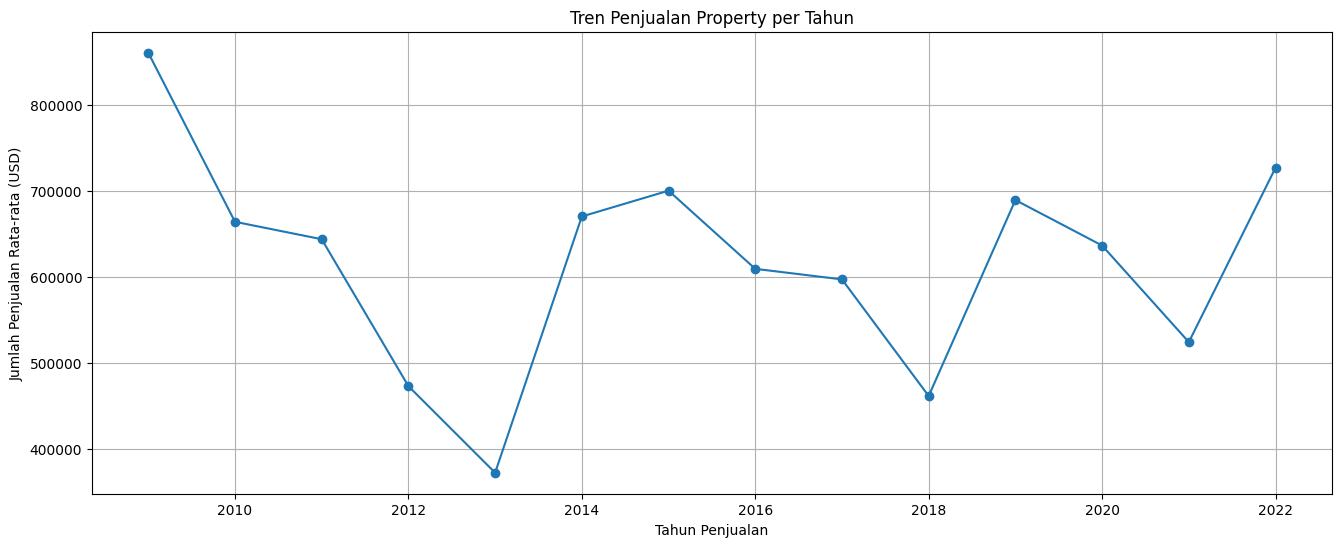

In [253]:
# Tren Waktu: Gunakan line plot untuk menunjukkan tren rata-rata Harga (USD) dari tahun ke tahun.

prop_per_year = real_estate_trans_df.groupby('Year')['Sale Price'].mean().reset_index()



plt.figure(figsize=(16,6))
plt.plot(prop_per_year['Year'], prop_per_year['Sale Price'], marker='o')

plt.title("Tren Penjualan Property per Tahun")
plt.xlabel("Tahun Penjualan")
plt.ylabel("Jumlah Penjualan Rata-rata (USD)")
plt.grid(True)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_19448\954856474.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




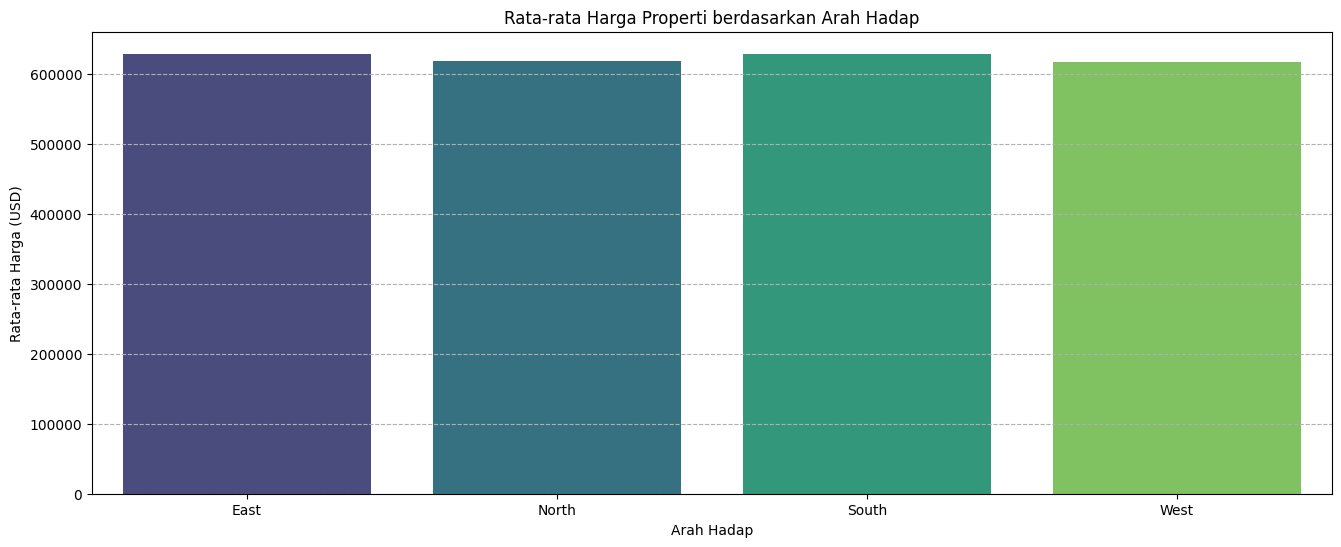

In [274]:
avg_price_per_per_face = real_estate_trans_df.groupby('Face', observed=True)['Sale Price'].mean().reset_index()

# --- KODE PERBAIKAN 1: Hapus Skala Log ---

plt.figure(figsize=(16, 6))
sns.barplot(data=avg_price_per_per_face, x='Face', y='Sale Price', palette='viridis')

plt.title('Rata-rata Harga Properti berdasarkan Arah Hadap')
plt.xlabel('Arah Hadap')
plt.ylabel('Rata-rata Harga (USD)')
plt.grid(True, axis='y', linestyle='--') # Tambahan grid agar lebih mudah dibaca
plt.show()

In [279]:
#Menggunakan Plotly Express ---
import plotly.express as px

fig = px.bar(avg_price_per_per_face,
             x='Face',
             y='Sale Price',
             color='Face', # Memberi warna berbeda untuk setiap bar
             title='Rata-rata Harga Properti berdasarkan Arah Hadap (Interaktif)',
             labels={'Sale Price': 'Rata-rata Harga (USD)', 'Face': 'Arah Hadap'},
             text_auto=True) # Otomatis menambahkan label

fig.show()

---

**5: Pembentukan Hipotesis dan Ringkasan**

1. Hipotesis dari Box Plot Status Renovasi:
- Temuan: Dari box plot, terlihat bahwa properti yang "Sudah" direnovasi (diasumsikan berusia > 10 tahun) secara konsisten memiliki median harga jual yang lebih tinggi di berbagai tipe properti.
- Hipotesis 1: "Status renovasi properti berpengaruh signifikan terhadap harga jual. Properti yang telah direnovasi cenderung memiliki valuasi harga yang lebih tinggi dibandingkan dengan properti yang belum direnovasi."

2. Hipotesis dari Heatmap Korelasi:
- Temuan: Heatmap menunjukkan korelasi positif yang sangat kuat (0.85) antara Estimated Value dan Sale Price.
- Hipotesis 2: "Terdapat hubungan linear positif yang kuat antara nilai estimasi (Estimated Value) dan harga jual aktual (Sale Price), menjadikannya prediktor harga jual yang paling potensial di antara fitur lainnya."


3. Hipotesis dari Bar Plot Arah Hadap:
- Temuan: Plot batang yang baru menunjukkan bahwa bar untuk Timur (East) sedikit lebih tinggi daripada Selatan (South).

- Hipotesis 3: "Arah hadap properti merupakan salah satu faktor yang memengaruhi harga jual. Properti yang menghadap ke Timur (East) memiliki harga jual rata-rata tertinggi, meskipun perbedaannya sangat tipis dengan yang menghadap ke Selatan."


Ringkasan Singkat Temuan Kunci (Untuk Manajemen)

- Kepada: Manajemen Perusahaan Properti
- Dari: ''''', Analis Data
- Subjek: Ringkasan Analisis Eksplorasi Faktor Harga Properti

Berikut adalah ringkasan temuan kunci dari analisis data penjualan properti yang telah dilakukan:

1. Prediktor Harga Utama: Analisis menunjukkan bahwa Nilai Estimasi (Estimated Value) memiliki korelasi positif yang sangat kuat (0.85) dengan harga jual akhir. Hal ini mengindikasikan bahwa model valuasi internal kita sudah cukup akurat dalam memprediksi harga pasar. Sebagian besar properti yang terjual berada di rentang harga bawah hingga menengah, dengan beberapa properti bernilai sangat tinggi yang mendongkrak harga rata-rata.

2. Faktor Peningkat Nilai: Dua faktor non-ukuran yang terlihat berpengaruh signifikan adalah status renovasi dan arah hadap properti. Properti yang telah direnovasi (diasumsikan berusia lebih dari 10 tahun) secara konsisten menunjukkan harga jual median yang lebih tinggi. Selain itu, properti yang menghadap ke Timur (East) memiliki harga jual rata-rata tertinggi, diikuti sangat tipis oleh arah Selatan (South). Keduanya secara signifikan lebih bernilai dibandingkan arah Utara dan Barat. Temuan ini bisa menjadi informasi penting untuk menonjolkan kelebihan properti dalam strategi pemasaran.

3. Tren Pasar: Data historis menunjukkan adanya tren kenaikan harga jual properti dari tahun ke tahun, dengan puncak yang terlihat jelas sekitar tahun 2021. Ini mengindikasikan apresiasi nilai pasar secara umum dan prospek investasi yang positif.

Analisis ini dapat menjadi dasar yang kuat untuk strategi penentuan harga, fokus pemasaran, dan keputusan investasi properti di masa mendatang.